In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [68]:
df=pd.read_csv("StudentsPerformance.csv")
df.head(50)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [69]:
cleanup_s = {"gender":{"male" : 0 , "female":1}}
df.replace(cleanup_s,inplace=True)

In [70]:
print(df["test preparation course"].describe())


count     1000
unique       2
top       none
freq       642
Name: test preparation course, dtype: object


In [71]:
cleanup_s = {"test preparation course":{"none" : 0 , "completed":1}}
df.replace(cleanup_s,inplace=True)

In [72]:
print(df["lunch"].describe())

count         1000
unique           2
top       standard
freq           645
Name: lunch, dtype: object


In [73]:
cleanup_s = {"lunch":{"standard" : 0 , "free/reduced":1}}
df.replace(cleanup_s,inplace=True)

In [74]:
print(df["parental level of education"].describe())

count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object


In [75]:
cleanup_s = {"parental level of education":{"some high school" : 0 , "high school":1,"associate's degree" : 2 , "some college":3,"bachelor's degree" : 4 , "master's degree":5}}
df.replace(cleanup_s,inplace=True)

In [76]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,4,0,0,72,72,74
1,1,group C,3,0,1,69,90,88
2,1,group B,5,0,0,90,95,93
3,0,group A,2,1,0,47,57,44
4,0,group C,3,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,5,0,1,88,99,95
996,0,group C,1,1,0,62,55,55
997,1,group C,1,1,1,59,71,65
998,1,group D,3,0,1,68,78,77


In [77]:
print(df["race/ethnicity"].describe())

count        1000
unique          5
top       group C
freq          319
Name: race/ethnicity, dtype: object


In [78]:
cleanup_s = {"race/ethnicity":{"group A" : 0 , "group B":1,"group C" : 2 , "group D":3,"group E" : 4 }}
df.replace(cleanup_s,inplace=True)

In [79]:
print(df["race/ethnicity"].describe())

count    1000.000000
mean        2.174000
std         1.157179
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: race/ethnicity, dtype: float64


In [80]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,4,0,0,72,72,74
1,1,2,3,0,1,69,90,88
2,1,1,5,0,0,90,95,93
3,0,0,2,1,0,47,57,44
4,0,2,3,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,5,0,1,88,99,95
996,0,2,1,1,0,62,55,55
997,1,2,1,1,1,59,71,65
998,1,3,3,0,1,68,78,77


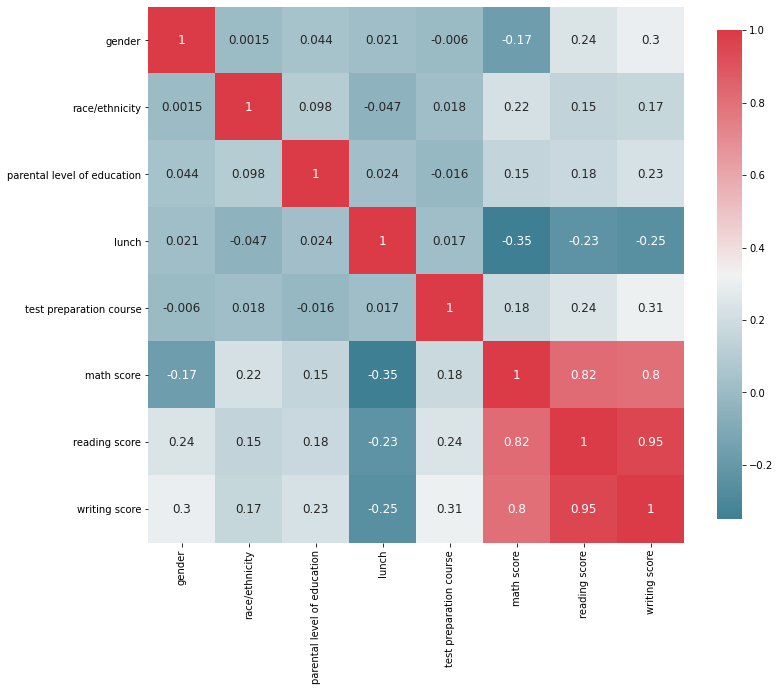

In [81]:
def plot_correlation_map( df ):
    corr=df.corr()
    s,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})
plot_correlation_map(df)

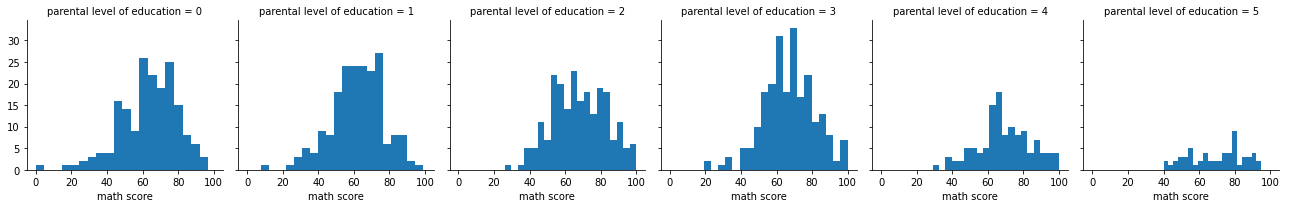

In [82]:
grid=sns.FacetGrid(df,col="parental level of education")
grid.map(plt.hist,"math score",bins=20)
grid.add_legend()

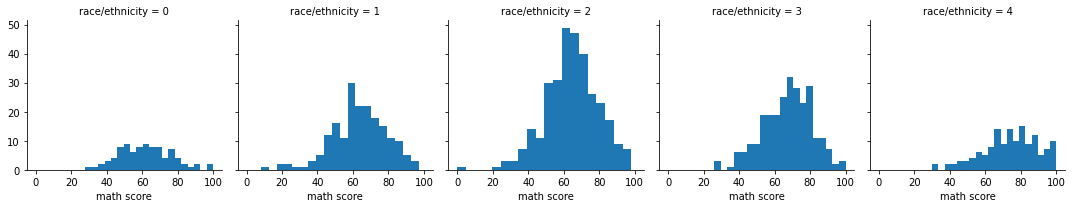

In [83]:
grid=sns.FacetGrid(df,col="race/ethnicity")
grid.map(plt.hist,"math score",bins=20)
grid.add_legend()

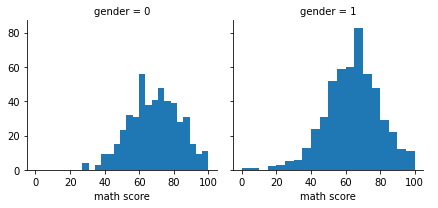

In [84]:
grid=sns.FacetGrid(df,col="gender")
grid.map(plt.hist,"math score",bins=20)
grid.add_legend()

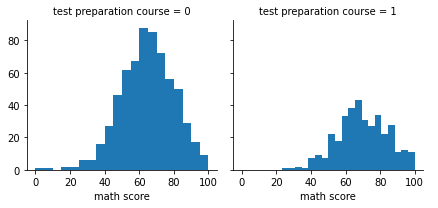

In [85]:
grid=sns.FacetGrid(df,col="test preparation course")
grid.map(plt.hist,"math score",bins=20)
grid.add_legend()

In [148]:
x=df[["gender","lunch","test preparation course","reading score","writing score"]]
y=df["math score"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 33.50807628019568
R squared 0.8647292776126259


In [125]:
x=df[["gender","lunch","test preparation course","reading score","writing score"]]
y=df["math score"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 35.29171966918264
R squared 0.8575287827918495


In [129]:
x=df[["gender","lunch","test preparation course","reading score","writing score"]]
y=df["math score"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
 
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  33.74826243550017
R squared:  0.8637596560066644


We can conclude That reading and writing score are related to math score. But the relation is not strong enougth to predict the result with a good precision. Other features such as the gender and test preparation course allow us to have a better precision

In [145]:
x=df[["gender","lunch","test preparation course","reading score","writing score"]]
y=df["math score"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=40)
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("R squared: ", metrics.r2_score(y_test,y_pred))

MSE:  46.95081782661723
R squared:  0.7985298823829048
